# *Explanatory Data Analysis*

In [1]:
import numpy as np #library for numerical computing
import pandas as pd #library for data manipulation and analysis
import matplotlib.pyplot as plt #library for data visualization
import seaborn as sns #library for statistical data visualization

In [3]:
df = pd.read_csv('Data/test.csv') #read the data
df.head() #display the first 5 rows of the data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info() #display the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# Column info:
```
Survived: Survival 0 --> no, 1--> yes
Pclass: Ticket Class 1--> 1st, 2-->2nd, 3-->3rd
Name: Passenger name
Sex: Gender 
Age: Age in years
Sibsp: number of siblings / spouses aboard the Titanic
Parch: Number of Parents / children aboard the Titanic
Ticket: Ticket Number
fare: Passenger fare
Cabin: Cabin Number
Embarked: Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton
```

In [5]:
#check for missing values
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
#check for outliers
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# *Data Cleaning*

<Axes: >

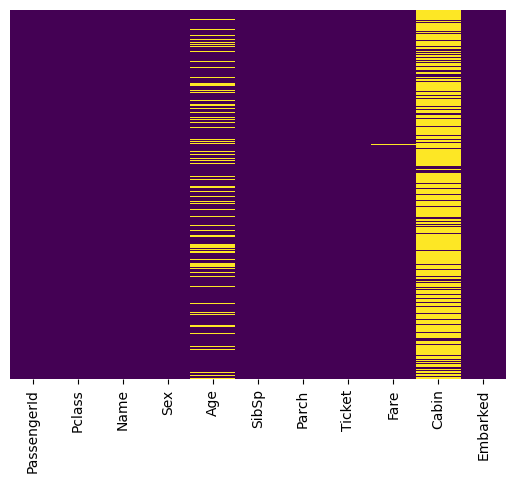

In [10]:
#checking nan values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### As we can see there are many nan values in _Cabin_ and _Age_ column. So I will drop _Cabin_ column and I will fill nan from Age column with mean of that column. Also I will delete nan values from other columns

In [11]:
#deleting the column Cabin
df.drop('Cabin',axis=1,inplace=True)

In [12]:
#filling the missing values in the Age column
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [13]:
#Dropping the nan values from the Embarked column
df.dropna(inplace=True)

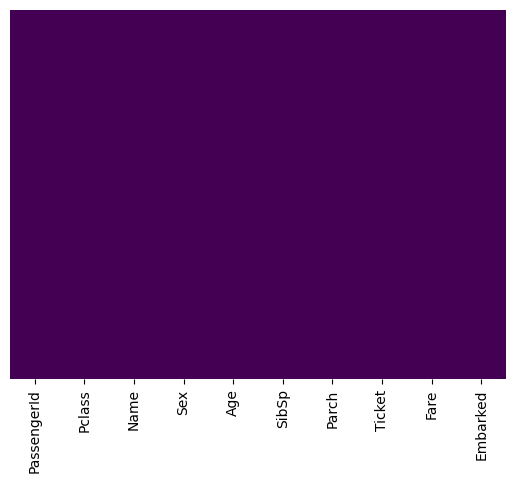

In [14]:
#checking the nan values again
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [15]:
#checking the nan values again
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Column info:
```
Survived: Survival 0 --> no, 1--> yes
Pclass: Ticket Class 1--> 1st, 2-->2nd, 3-->3rd
Name: Passenger name
Sex: Gender 
Age: Age in years
Sibsp: number of siblings / spouses aboard the Titanic
Parch: Number of Parents / children aboard the Titanic
Ticket: Ticket Number
fare: Passenger fare
Cabin: Cabin Number
Embarked: Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton
```

I will not use PassengerId, Name, Ticket, fare and Cabin columns for Machine Learning model

In [16]:
#dropping the column PassengerId
df.drop('PassengerId',axis=1,inplace=True)

In [17]:
#dropping the column Name
df.drop('Name',axis=1,inplace=True)

In [18]:
#dropping the column Ticket
df.drop('Ticket',axis=1,inplace=True)

In [19]:
#dropping the column Fare
df.drop('Fare',axis=1,inplace=True)

In [20]:
#rechecking the data
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


### we need to convert the categorical data into numerical data. We can use get_dummies or map function.

In [21]:
#using map function to convert the categorical data into numerical data
gender = {'male': 1, 'female': 0}
df['Gender'] = df['Sex'].map(gender)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,3,male,34.5,0,0,Q,1
1,3,female,47.0,1,0,S,0
2,2,male,62.0,0,0,Q,1
3,3,male,27.0,0,0,S,1
4,3,female,22.0,1,1,S,0


In [22]:
#Dropping Sex column
df.drop('Sex', axis=1, inplace=True)

In [23]:
#one hot encoding for Embarked column
df = pd.get_dummies(df, columns=['Embarked'])
df.head()

,Pclass,Age,SibSp,Parch,Gender,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,1,False,True,False
1,3,47.0,1,0,0,False,False,True
2,2,62.0,0,0,1,False,True,False
3,3,27.0,0,0,1,False,False,True
4,3,22.0,1,1,0,False,False,True


In [24]:
#chenging true and false values to 1 and 0
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

In [25]:
#checking the data
df.head()

,Pclass,Age,SibSp,Parch,Gender,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,1,0,1,0
1,3,47.0,1,0,0,0,0,1
2,2,62.0,0,0,1,0,1,0
3,3,27.0,0,0,1,0,0,1
4,3,22.0,1,1,0,0,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      417 non-null    int64  
 1   Age         417 non-null    float64
 2   SibSp       417 non-null    int64  
 3   Parch       417 non-null    int64  
 4   Gender      417 non-null    int64  
 5   Embarked_C  417 non-null    int32  
 6   Embarked_Q  417 non-null    int32  
 7   Embarked_S  417 non-null    int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 24.4 KB


In [27]:
#saving the data
df.to_csv('Data/test_cleaned.csv', index=False)